In [1]:
import numpy as np
np.random.seed(0)
round = 25

def branin(x1, x2):
    y = float(
        (x2 - 5.1 / (4 * np.pi**2) * x1**2 + 5.0 / np.pi * x1 - 6.0) ** 2
        + 10 * (1 - 1.0 / (8 * np.pi)) * np.cos(x1)
        + 10
    )
    return y

In [2]:
# random search for the minimum of branin function 
x1 = np.random.uniform(-5, 10, round)
x2 = np.random.uniform(0, 15, round)
y = np.array([branin(x1[i], x2[i]) for i in range(round)])
min_idx = np.argmin(y)
print(f"Minimum value: {y[min_idx]}")
print(f"Minimizer: x1 = {x1[min_idx]}, x2 = {x2[min_idx]}")

Minimum value: 8.897608356467561
Minimizer: x1 = 1.9221904337939772, x2 = 1.9338944648227996


(0.0, 15.0)

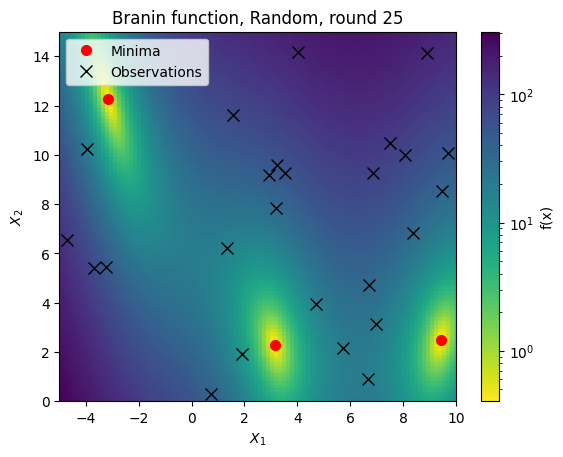

In [3]:
# plot contour plot of the branin funciton
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()

x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
fx = np.reshape(np.array([branin(x1, x2) for x1, x2 in vals]), (100, 100))

cm = ax.pcolormesh(x_ax, y_ax, fx,
                    norm=LogNorm(vmin=fx.min(),
                                vmax=fx.max()),
                    cmap='viridis_r')

minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14,
        lw=0, label="Minima")

ax.plot(x1, x2, "kx", markersize=8, label="Observations")

cb = fig.colorbar(cm)
cb.set_label("f(x)")

ax.legend(loc="best", numpoints=1)
ax.set_title(f"Branin function, Random, round {round}")
ax.set_xlabel("$X_1$")
ax.set_xlim([-5, 10])
ax.set_ylabel("$X_2$")
ax.set_ylim([0, 15])


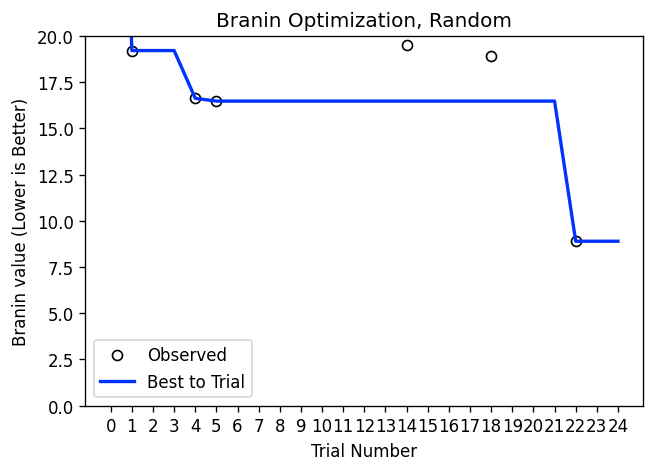

In [4]:
fig, ax = plt.subplots(figsize=(6,4), dpi=120)

ax.plot(y, ls='None', marker='o', mfc='None', mec='k', label='Observed')

best_to_trial = np.minimum.accumulate(y)
ax.plot(best_to_trial, color='#0033FF', lw=2, label='Best to Trial')

plt.xticks(range(len(y)))
plt.xlabel('Trial Number')
plt.ylabel('Branin value (Lower is Better)')
plt.title('Branin Optimization, Random')
plt.ylim(0, 20)
plt.legend()
plt.show()